# Auxiliar 3: Notación $O$
## Auxiliar: Esteban Muñoz

### P1. Vuelta a los números primos
En la clase auxiliar anterior, se entregaron 2 soluciones para comprobar si un número es primo, y 1 una solución para encontrar todos los números primos entre 1 y algún número $n$. Se explicó que la eficiencia de cada algoritmo es distinta, ¿Cómo puede comprobarlo empiricamente?

Muestre el tiempo de ejecución de un programa que encuentra todos los primos entre 1 y $n$, usando cada una de las soluciones.

**Solución**

Teóricamente se puede notar que la primera solución tiene una complejidad $O(n)$, pues se debe iterar por todos los números entre 2 y $n$ para obtener una respuesta. Por otra parte, el segundo algoritmo tiene una complejidad $O(\sqrt{n})$, por el mismo argumento anterior: dado un input $n$, el algoritmo ejecuta instrucciones de tiempo constante un total de $\sqrt{n}$ veces.

Para el tercer algoritmo es más difícil calcular su eficiencia. Por ahora, sólo interesa que este algoritmo es de tiempo $O(n\log{n})$.

Con esto en mente, al observar el tiempo de ejecución de cada algoritmo se debiese notar cómo el primero de ellos es el que tarda más tiempo de los 3, seguido del segundo algoritmo, y por último el tercer algoritmo debiese ser el más rápido de todos. Para verificar empíricamente estos resultados, se usará la funcion `perf_counter` que viene por defecto en la librería `time` de Python. Esta función está diseñada para realizar benchmarks de códigos, que es precisamente lo que se quiere realizar.

Antes de comenzar con el código, se importan las librerías y/o funciones que se usarán más adelante

In [1]:
import math
from time import perf_counter

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Luego, para poder medir el desempeño de cada función primero se deben definir. Para ello, simplemente se copia y pega la definición disponible en el notebook anterior

In [3]:
def es_primo(n: int) -> bool:
    if n == 0 or n == 1:
        return False
    
    for k in range(2, n):
        if n % k == 0:
            return False
        
    return True

In [4]:
def es_primo_sqrt(n: int) -> bool:
    if n == 0 or n == 1:
        return False
    
    for k in range(2, int(math.sqrt(n)) + 1):
        if n % k == 0:
            return False
    
    return True

In [5]:
def criba_de_eratostenes(n: int) -> list[bool]:
    primos = [True for _ in range(n+1)]
    primos[0] = False
    primos[1] = False
    p = 2
    while p**2 < n:
        # Si el número no ha sido marcado como no primo, entonces es primo
        if primos[p]:
            # Se marcan todos los múltiplos de p como no primos
            for k in range(p**2, n+1, p):
                primos[k] = False
        p += 1

    return primos

Ahora que se cuenta con las funciones disponibles en el código, se procede a realizar el cálculo necesario. Debe notar que se pide calcular el tiempo de ejecución que tarda cada función en encontrar **todos los primos** hasta el input $n$. Dado que las primeras 2 sólo indican si un número es o no primo, se debe realizar una iteración sobre los $n$ valores para almacenar los primos encontrados

In [6]:
# Listas con los tiempos de cada función para cada valor de n
t_es_primo = []
t_es_primo_sqrt = []
t_criba = []


for i in range(1, 1001):
    #Tiempo ejecución función es_primo
    tiempo_inicio = perf_counter()
    primos = []
    for n in range(1, i+1):
        primos.append(es_primo(n))

    tiempo_total = perf_counter() - tiempo_inicio
    t_es_primo.append(tiempo_total)

    #Tiempo ejecución función es_primo_sqrt
    tiempo_inicio = perf_counter()
    for n in range(1, i+1):
        primos = []
        primos.append(es_primo_sqrt(n))
    
    tiempo_total = perf_counter() - tiempo_inicio
    t_es_primo_sqrt.append(tiempo_total)

    #Tiempo ejecucion funcion criba_de_eratostenes
    tiempo_inicio = perf_counter()
    criba_de_eratostenes(n)
    tiempo_total = perf_counter() - tiempo_inicio
    t_criba.append(tiempo_total)


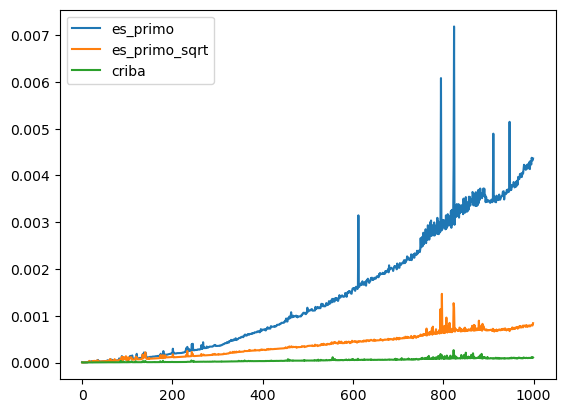

In [7]:
plt.plot(t_es_primo, label=r"es_primo")
plt.plot(t_es_primo_sqrt, label=r"es_primo_sqrt")
plt.plot(t_criba, label=r"criba")
plt.legend()
plt.show()

Las funciones se muestran en el orden esperado. Aún así, es importante notar el ruido existente en cada una de las mediciones, lo que se puede deber a múltiples factores: uno muy importante es que existe un `return` en las primeras 2 funciones dentro del loop. Como consecuencia, existen números para los que estas funciones entregan una respuesta en menos tiempo que para otros, aún siendo estos últimos mayores. Si analiza bien el código, podría notar que los números para los que más tiempo tardan estas funciones es, precisamente, para los números primos, pues con estos números se debe recorrer todo el ciclo para verificar que efectivamente son números primos. Por otra parte, los números para los que menos tiempo tardan en verificar si son primos es para los pares, dado que durante la primera iteración se encontrará de inmediato que son divisibles por 2, y por tanto las funciones entregan un `return` rápidamente.

Es por motivos como el anterior que muchos algoritmos no tienen sólo un único valor en su notación $O$. En efecto, es común encontrar en algunos de ellos un valor para el **mejor caso**, el **caso promedio**, y el **peor caso**.

Sin perjuicio de lo anterior, si para cada algoritmo se ejecutase el máximo de instrucciones posibles de forma consistente, aún sigue siendo normal observar mediciones ruidosas por diversos motivos: cambios en la memoria caché del sistema, otros procesos corriendo de forma concurrente en la máquina donde se ejecuta el código, optimizaciones en el lenguaje de programación para algunos inputs, tiempo de ejecución variable para cada instrucción en la CPU, etc.

Si usted está interesado en realizar un benchmarking más detallado, lo más recomendable es realizar un experimento repetible y bajo condiciones controladas similares: mismo equipo con los mismos componentes, mismos programas ejecutándose, mismas condiciones de temperatura, etc., y luego realizar un tratamiento estadístico de sus datos que puede ir desde el cálculo de la media para cada punto, hasta algún test de hipótesis en caso de querer observar algo particular en sus datos.

### P2. Subarreglo de suma máxima

A usted se le entrega un arreglo que contiene números positivos y negativos. El objetivo de este ejercicio es encontrar el Subarreglo que entregue la suma más grande posible
- ¿Cuál es la forma más sencilla de resolver este problema? Programe esta solución
- Mejore un poco esta solución. ¿Es posible disminuir el tiempo de ejecución de la solución anterior?
- _Bonus_: Intente ser aún más eficiente. ¿Puede resolver este problema en un orden
de $O(n)$?

¿Qué eficiencia tiene cada algoritmo? ¿Puede comprobarlo empíricamente?


**Solución**

La forma más sencilla de intentar resolver este problema es por medio de _fuerza bruta_. En este caso, aquello significa encontrar todos los subarreglos posibles en un array, y calcular la suma de los elementos de este subarreglo. Un subarreglo es un subconjunto de un arreglo, en donde todos sus elementos deben ser contiguos.

Para el algoritmo por fuerza bruta, se puede pensar el problema de la siguiente manera: cada subarreglo tiene un principio y/o un final distinto. Para obtenerlos todos, se puede iterar sobre todos los principios posibles, sobre todos los finales posibles, y obtener todos los posibles subarreglos entre estos pincipios y finales.

Dado que se plantea trabajar con arreglos, para este caso se usarán los arrays de `numpy`.

In [21]:
def sub_suma_maxima_1(arreglo: np.ndarray) -> tuple[float, int, int]:
    suma_maxima = -np.inf
    inicio = 0
    final = 0

    for i in range(len(arreglo)):
        for j in range(i, len(arreglo)):
            suma = 0
            for k in range(i, j+1):
                suma += arreglo[k]
                if suma > suma_maxima:
                    suma_maxima, inicio, final = suma, i, j

    return suma_maxima, inicio, final

El algoritmo anterior guarda en todo momento la suma más grande encontrada, así como también las posiciones inicial y final del subarreglo respectivo. Estos valores se actualizan cada vez que alguna suma parcial termina siendo mayor que la suma más grande encontrada previamente.

Este algoritmo toma tiempo $O(n^3)$. Para calcularlo, puede notar que existen 3 iteraciones anidadas que terminan ejecutando instrucciones de tiempo constante, por lo que para calcular el tiempo total de ejecución puede plantear la siguiente sumatoria

$$
T(n) = \sum_{i=0}^n \sum_{j=i}^n \sum_{k=i}^{j+1} 1
$$

Y notar que el resultado es aproximadamente $T(n) \approx n^3$

Este algoritmo admite la siguiente optimización: no es necesario realizar una tercera iteración. Es posible obtener la suma parcial de cada subarreglo en la medida que se cambia el final de los mismos, obteniendo el siguiente algoritmo:

In [22]:
def sub_suma_maxima_2(arreglo: np.ndarray) -> tuple[float, int, int]:
    suma_maxima = -np.inf
    inicio = 0
    final = 0

    for i in range(len(arreglo)):
        suma = 0
        for j in range(i, len(arreglo)):
            suma += arreglo[j]
            if suma > suma_maxima:
                suma_maxima, inicio, final = suma, i, j
    
    return suma_maxima, inicio, final


Por un argumento similar al caso anterior, se puede verificar que la complejidad en este caso es de $O(n^2)$, lo que ya es una mejora sin haber cambiado mucho el código.

_Bonus_: ¿Es posible resolver este problema en tiempo $O(n)$? La respuesta es **sí**. Y para lograrlo se debe cambiar de estrategia. Volviendo al enunciado, debe notar que el array siempre contendrá tanto números positivos como negativos, y la clave se encuentra en si vale la pena _soportar_ la disminución que entrega un número negativo.

Al igual que en los algoritmos anteriores, en todo momento se guardará la suma más grande encontrada y los índices que denotan el inicio y fin del subarreglo. Se iterará sobre todo el arreglo, asumiendo que el inicio del subarreglo de suma mayor se encuentra en la posición 0. Sin embargo, existe una importante diferencia: en cada iteración, se preguntará si la suma parcial llega a ser menor que 0.

Piense por un momento que implicancia tiene esto para la suma. Si la suma actual del subarreglo es 0, entonces no importa si se incluye o no en la siguiente iteración; si la suma es positiva, vale la pena mantener el subarreglo actual y extenderlo hasta el próximo elemento del arreglo. Por otra parte, si la suma es negativa, no tiene sentido incluir el actual subarreglo en la siguiente iteración, pues es mejor partir de 0 que partir de un número negativo. Si este último es el caso, se utiliza una variable auxiliar para marcar el próximo elemento del arreglo como el inicio de un nuevo subarreglo, y que después puede ser útil para actualizar el índice si el nuevo subarreglo en algún momento entrega una suma mayor a la ya registrada.

In [23]:
def sub_suma_maxima_3(arreglo: np.ndarray) -> tuple[float, int, int]:
  suma_maxima = -np.inf
  suma = 0
  inicio = 0
  final = 0
  inicio_alternativo = 0

  for i in range(len(arreglo)):
    suma += arreglo[i]
    if suma > suma_maxima:
      suma_maxima, inicio, final = suma, inicio_alternativo, i
    
    if suma < 0:
      suma = 0
      inicio_alternativo = i + 1
  return suma_maxima, inicio, final

Un test sencillo para determinar que la respuesta es la adecuada, consiste en probar que todas las funciones entreguen el mismo resultado para un input aleatorio.

In [24]:
arreglo = np.random.randint(-100, 100, 200)
print(sub_suma_maxima_1(arreglo))
print(sub_suma_maxima_2(arreglo))
print(sub_suma_maxima_3(arreglo))

(1585, 2, 181)
(1585, 2, 181)
(1585, 2, 181)


Finalmente, para testear la eficiencia temporal de cada algoritmo se empleará la misma estrategia utilizada en la pregunta anterior.

In [25]:
t_suma_maxima_1 = []
t_suma_maxima_2 = []
t_suma_maxima_3 = []

for i in range(1, 201):
    arreglo = np.random.randint(-100, 100, i)
    
    #Tiempo ejecución función 1
    start_time = perf_counter()
    sub_suma_maxima_1(arreglo)

    total_time = perf_counter() - start_time
    t_suma_maxima_1.append(total_time)

    #Tiempo ejecución función 2
    start_time = perf_counter()
    sub_suma_maxima_2(arreglo)

    total_time = perf_counter() - start_time
    t_suma_maxima_2.append(total_time)

    #Tiempo ejecucion funcion 3
    start_time = perf_counter()
    sub_suma_maxima_3(arreglo)

    total_time = perf_counter() - start_time
    t_suma_maxima_3.append(total_time)


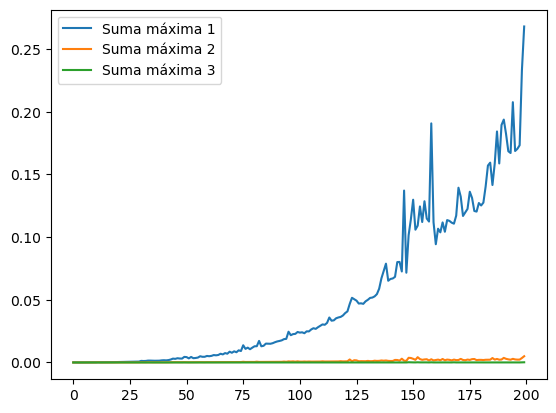

In [26]:
plt.plot(t_suma_maxima_1, label=r"Suma máxima 1")
plt.plot(t_suma_maxima_2, label=r"Suma máxima 2")
plt.plot(t_suma_maxima_3, label=r"Suma máxima 3")
plt.legend()
plt.show()